# IMDB (Internet Movie Database)

## [Keras Dataset](https://keras.io/datasets/)

IMDB Movie reviews sentiment classification

- Reviews de 25.000 peliculas de IMDB
- Etiquetadas por sentimiento (Positivo/Negativo)
- Los reviews ya estan pre-procesados
- Cada review esta codificado como una secuencia de indices de palabras (integers)
- Los indices estan ordenados por frecuencia. Es decir que la palabra que tiene el índice 3 es la 3er palabra mas frecuente.
- 0 no es el indice de una palabra específica sino que se usa para codificar las palabras desconocidas

In [9]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from keras import optimizers
from fnn_helper import PlotLosses
from keras.callbacks import ModelCheckpoint 
%matplotlib inline

np.random.seed(42)

## Cargo Dataset

In [2]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## Imprimo muestra

In [3]:
print('Review:')
print(x_train[0])
print()
print('Sentimiento:')
print(y_train[0])

Review:
[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]

Sentimiento:
1


In [4]:
# Turning the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train.shape)
print(x_test.shape)

(25000, 1000)
(25000, 1000)


In [5]:
x_train[0]

array([ 0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0

In [6]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


In [18]:
# Armar el modelo
# Cual es la dimension de entrada? R:1000
# Cual es la cantidad de salidas? R: 2
# 

model = Sequential()
# Agregar capa densa. Setear la funcion de activacion e input_dim
model.add(Dense(1000, activation='sigmoid', input_dim=1000, kernel_initializer='normal', name='Entrada'))

# Agregar todas las capas densas que crea necesario para que el modelo funcione mejor
# Puede no agregar ninguna si no le parece necesario
# model.add(Dense(2000, activation='sigmoid', kernel_initializer='normal', name='Hidden1'))
# model.add(...)

model.add(Dropout(0.5))

# Agregar ultima capa densa con función de activacion softmax
model.add(Dense(2, activation='softmax', kernel_initializer='normal', name='Salida'))

model.summary()

# Compilar el modelo
# Juegue cambiando el optimizer. Recomendados: 'sgd', 'adam', 'rmsprop'
model.compile(loss='categorical_crossentropy', optimizer=optimizers.rmsprop(decay=1e-3), metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
Salida (Dense)               (None, 2)                 2002      
Total params: 1,003,002
Trainable params: 1,003,002
Non-trainable params: 0
_________________________________________________________________


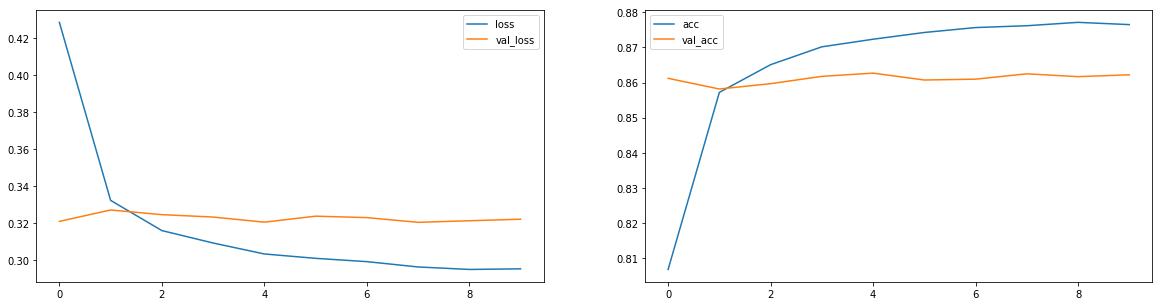

26s - loss: 0.2952 - acc: 0.8765 - val_loss: 0.3220 - val_acc: 0.8622


In [19]:
# Entrenar el modelo
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_test, y_val_categorical=y_test)
checkpointer = ModelCheckpoint(filepath='imdb_model.hdf5', verbose=0, save_best_only=True)
# Modifique batch_size y epochs si lo desea
#hist = 
model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test), 
          verbose=2,
          callbacks=[plot_losses, checkpointer])

In [20]:
# Evaluar el modelo
score = model.evaluate(x_test, y_test, verbose=0)
print("accuracy: ", score[1])

accuracy:  0.8622


Ejemplo:
<img src="images/training_IMDB.png" alt="Drawing" style="width:100%;"/>

In [9]:
# Pruebe de usar alguna de las técnicas vistas para evitar el overfitting